In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (574945, 341)
Test shape: (107, 336)


In [3]:
print("="*80)
print("TRAINING DATA STATISTICS")
print("="*80)

print(f"\nShape: {train_df.shape}")
print(f"Memory usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nData types:")
print(train_df.dtypes.value_counts())

print(f"\nBasic statistics:")
print(train_df.describe())

TRAINING DATA STATISTICS

Shape: (574945, 341)
Memory usage: 1739.49 MB

Data types:
float64    332
str          8
int64        1
Name: count, dtype: int64

Basic statistics:
       sequence_counter          acc_x          acc_y          acc_z  \
count     574945.000000  574945.000000  574945.000000  574945.000000   
mean          43.645234       1.639980       1.790704      -0.459811   
std           45.717673       5.781259       5.003945       6.096490   
min            0.000000     -34.585938     -24.402344     -42.855469   
25%           17.000000      -2.964844      -2.121094      -5.417969   
50%           35.000000       2.972656       0.695312      -1.562500   
75%           54.000000       6.343750       6.816406       5.164062   
max          699.000000      46.328125      27.183594      30.078125   

               rot_w          rot_x          rot_y          rot_z  \
count  571253.000000  571253.000000  571253.000000  571253.000000   
mean        0.360375      -0.119916   

MISSING VALUES ANALYSIS

Total missing values: 3,597,807

Columns with missing values:
        Column  Missing_Count  Missing_Percentage
20       thm_5          33286            5.789423
340  tof_5_v63          30142            5.242588
301  tof_5_v24          30142            5.242588
295  tof_5_v18          30142            5.242588
296  tof_5_v19          30142            5.242588
..         ...            ...                 ...
121  tof_2_v36           6224            1.082538
13       rot_x           3692            0.642148
15       rot_z           3692            0.642148
14       rot_y           3692            0.642148
12       rot_w           3692            0.642148

[329 rows x 3 columns]


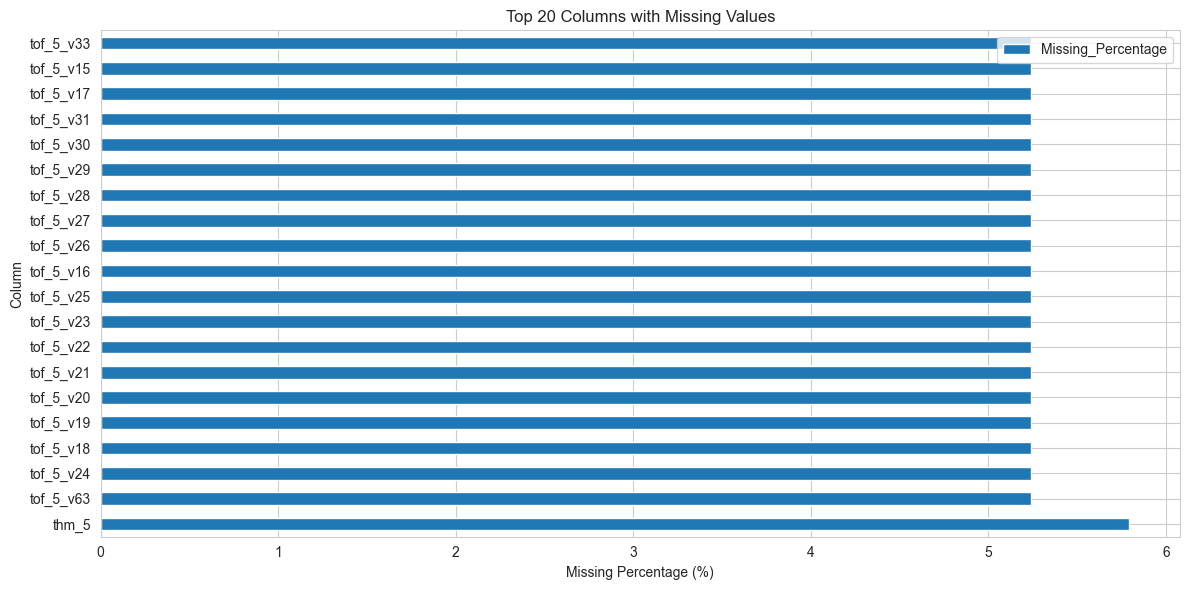


✅ Saved: plots/01_missing_values.png


In [ ]:
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_count = train_df.isnull().sum()
missing_pct = (train_df.isnull().sum() / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_count.index,
    'Missing_Count': missing_count.values,
    'Missing_Percentage': missing_pct.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

print(f"\nTotal missing values: {train_df.isnull().sum().sum():,}")
print(f"\nColumns with missing values:")
print(missing_df)

if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    missing_df.head(20).plot(x='Column', y='Missing_Percentage', kind='barh', ax=ax)
    plt.title('Top 20 Columns with Missing Values')
    plt.xlabel('Missing Percentage (%)')
    plt.tight_layout()
    plt.savefig('../plots/01_missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n Saved: plots/01_missing_values.png")

TARGET VARIABLE ANALYSIS

Column names:
['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject', 'orientation', 'behavior', 'phase', 'gesture', 'acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z', 'thm_1', 'thm_2', 'thm_3', 'thm_4']

Sequence Type Distribution:
sequence_type
Target        344058
Non-Target    230887
Name: count, dtype: int64

Total unique sequence types: 2


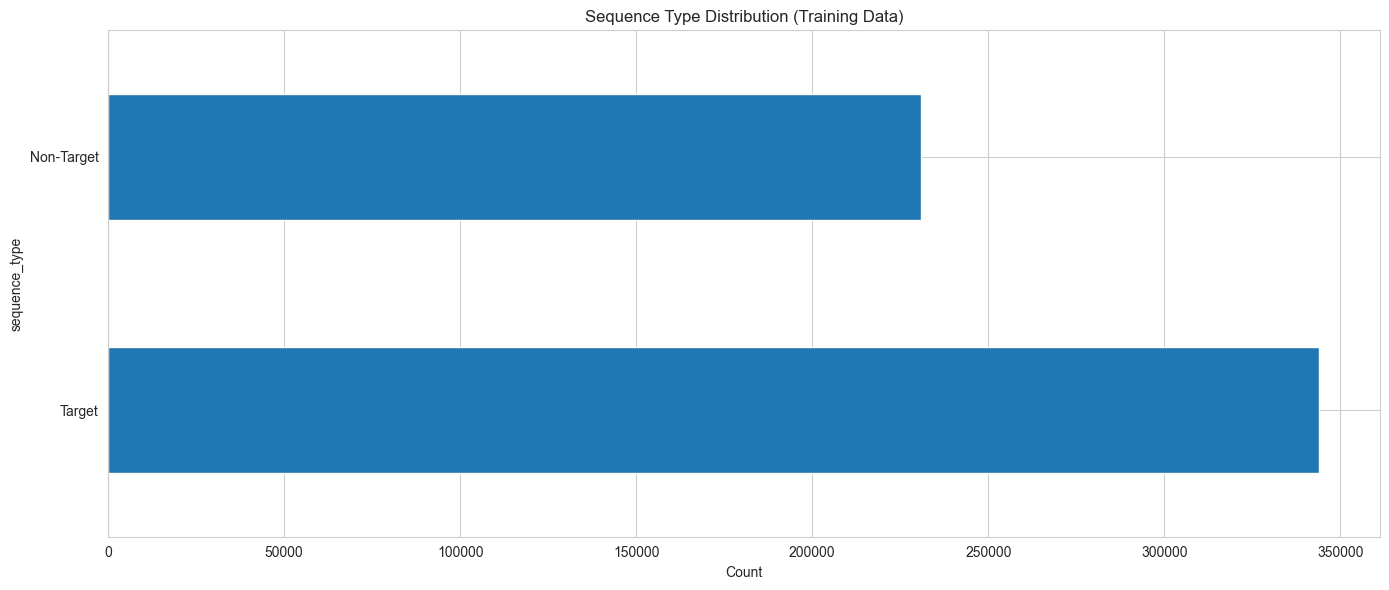


 Saved: plots/02_sequence_type_distribution.png


In [6]:
print("="*80)
print("TARGET VARIABLE ANALYSIS")
print("="*80)

#check column names
print("\nColumn names:")
print(train_df.columns.tolist()[:20])  # first 20 columns

# check sequence_type (possible label)
if 'sequence_type' in train_df.columns:
    print(f"\nSequence Type Distribution:")
    seq_dist = train_df['sequence_type'].value_counts()
    print(seq_dist)
    print(f"\nTotal unique sequence types: {train_df['sequence_type'].nunique()}")
    
    # visualization
    fig, ax = plt.subplots(figsize=(14, 6))
    seq_dist.plot(kind='barh', ax=ax)
    plt.title('Sequence Type Distribution (Training Data)')
    plt.xlabel('Count')
    plt.tight_layout()
    plt.savefig('../plots/02_sequence_type_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("\n Saved: plots/02_sequence_type_distribution.png")

In [7]:
print("="*80)
print("SENSOR DATA ANALYSIS")
print("="*80)

# Separate sensor columns
sensor_cols = [col for col in train_df.columns if col not in 
               ['row_id', 'sequence_type', 'sequence_id', 'sequence_counter', 'subject', 'orientation']]

print(f"\nSensor columns: {len(sensor_cols)}")
print(f"Examples: {sensor_cols[:10]}")

# Categorize by sensor type
imu_cols = [col for col in sensor_cols if 'acc' in col or 'rot' in col]
temp_cols = [col for col in sensor_cols if 'thm' in col]
tof_cols = [col for col in sensor_cols if 'tof' in col]

print(f"\nSensor breakdown:")
print(f"  IMU (accel + gyro): {len(imu_cols)} columns")
print(f"  Temperature: {len(temp_cols)} columns")
print(f"  TOF (distance): {len(tof_cols)} columns")

# Sensor statistics
print(f"\nIMU Statistics:")
print(train_df[imu_cols].describe())

SENSOR DATA ANALYSIS

Sensor columns: 335
Examples: ['behavior', 'phase', 'gesture', 'acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z']

Sensor breakdown:
  IMU (accel + gyro): 7 columns
  Temperature: 5 columns
  TOF (distance): 320 columns

IMU Statistics:
               acc_x          acc_y          acc_z          rot_w  \
count  574945.000000  574945.000000  574945.000000  571253.000000   
mean        1.639980       1.790704      -0.459811       0.360375   
std         5.781259       5.003945       6.096490       0.225739   
min       -34.585938     -24.402344     -42.855469       0.000000   
25%        -2.964844      -2.121094      -5.417969       0.180237   
50%         2.972656       0.695312      -1.562500       0.340332   
75%         6.343750       6.816406       5.164062       0.503479   
max        46.328125      27.183594      30.078125       0.999390   

               rot_x          rot_y          rot_z  
count  571253.000000  571253.000000  571253.000000  
m

SENSOR DATA DISTRIBUTIONS


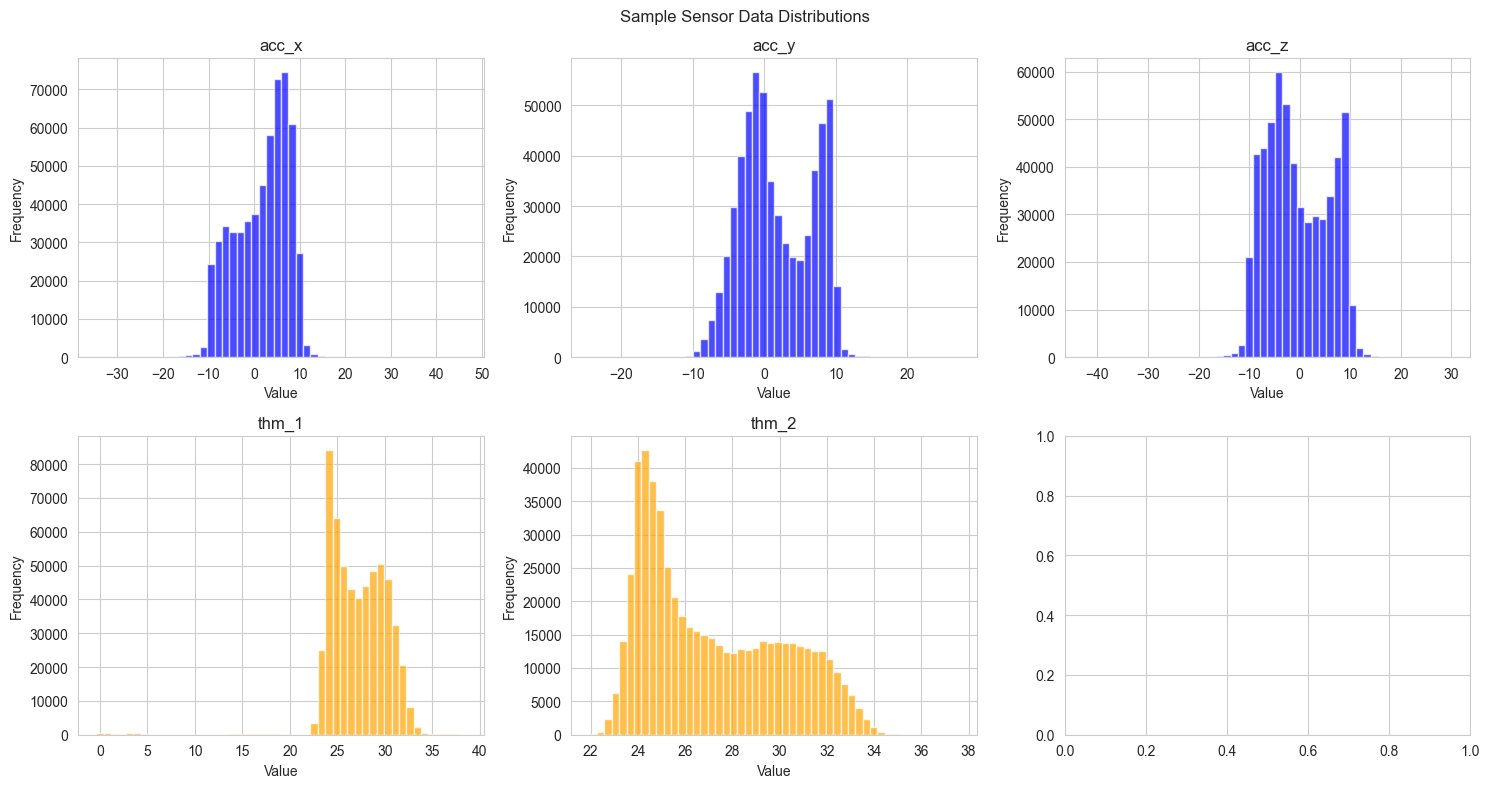


 Saved: plots/03_sensor_distributions.png


In [8]:
print("="*80)
print("SENSOR DATA DISTRIBUTIONS")
print("="*80)

# Select sample columns for visualization
sample_imu = imu_cols[:3]
sample_temp = temp_cols[:2]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Sample Sensor Data Distributions')

# IMU
for idx, col in enumerate(sample_imu):
    row = idx // 3
    col_idx = idx % 3
    axes[0, col_idx].hist(train_df[col].dropna(), bins=50, alpha=0.7, color='blue')
    axes[0, col_idx].set_title(f'{col}')
    axes[0, col_idx].set_xlabel('Value')
    axes[0, col_idx].set_ylabel('Frequency')

# Temperature
for idx, col in enumerate(sample_temp):
    axes[1, idx].hist(train_df[col].dropna(), bins=50, alpha=0.7, color='orange')
    axes[1, idx].set_title(f'{col}')
    axes[1, idx].set_xlabel('Value')
    axes[1, idx].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../plots/03_sensor_distributions.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Saved: plots/03_sensor_distributions.png")

In [ ]:
print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Calculate correlation (sampled for speed)
sample_cols = imu_cols[:5] + temp_cols[:2]
corr_matrix = train_df[sample_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax)
plt.title('Sensor Data Correlation Matrix (Sample)')
plt.tight_layout()
plt.savefig('../plots/04_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n Saved: plots/04_correlation_matrix.png")